# Apps project - Tier 3 - Complete


**Brief**

Did Apple Store apps receive better reviews than Google Play apps?

## Stages of the project

1. Sourcing and loading 
    * Load the two datasets
    * Pick the columns that we are going to work with 
    * Subsetting the data on this basis 
 
 
2. Cleaning, transforming and visualizing
    * Check the data types and fix them
    * Add a `platform` column to both the `Apple` and the `Google` dataframes
    * Changing the column names to prepare for a join 
    * Join the two data sets
    * Eliminate the `NaN` values
    * Filter only those apps that have been reviewed at least once
    * Summarize the data visually and analytically (by the column `platform`)  
  
  
3. Modelling 
    * Hypothesis formulation
    * Getting the distribution of the data
    * Permutation test 


4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?
    * Other models we could have used. 
    

## Importing the libraries

In this case we are going to import pandas, numpy, scipy, random and matplotlib.pyplot

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

## Stage 1 -  Sourcing and loading data

### 1a. Source and load the data
The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).
Download the datasets and save them in your working directory.

In [5]:
google = pd.read_csv('data/googleplaystore.csv')
google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [7]:
apple = pd.read_csv('data/AppleStore.csv', index_col=0)
apple.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


### 1b. Pick the columns we'll work with

From the documentation of these datasets, we can infer that the most appropriate columns to answer the brief are:

1. Google:
    * `Category` 
    * `Rating`
    * `Reviews`
    * `Price` (maybe)
2. Apple:    
    * `prime_genre` 
    * `user_rating` 
    * `rating_count_tot`
    * `price` (maybe)

### 1c. Subsetting accordingly

Let's select only those columns that we want to work with from both datasets. We'll overwrite the subsets in the original variables.

In [8]:
google = google[['Category','Rating','Reviews','Price']]
google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [9]:
apple = apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
1,Games,4.0,21292,3.99
2,Productivity,4.0,161065,0.00
3,Weather,3.5,188583,0.00


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check the data types for both Apple and Google, and fix them

Types are crucial for data science in Python. Let's determine whether the variables we selected in the previous section belong to the types they should do, or whether there are any errors here. 

In [11]:
apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

This is looking healthy. But what about our Google data frame?

In [12]:
google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

Weird. The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. Let's investigate the unique values of this column. 

In [18]:
google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Aha! Fascinating. There are actually two issues here. 

- Firstly, there's a price called `Everyone`. That is a massive mistake! 
- Secondly, there are dollar symbols everywhere! 


Let's address the first issue first. Let's check the datapoints that have the price value `Everyone`

In [25]:
google[google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Thankfully, it's just one row. We've gotta get rid of it. 

In [26]:
google = google[google['Price'] != 'Everyone']
google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Our second problem remains: I'm seeing dollar symbols when I close my eyes! (And not in a good way). 

This is a problem because Python actually considers these values strings. So we can't do mathematical and statistical operations on them until we've made them into numbers. 

In [28]:
nosymb = google.Price.str.replace('$','')
google['Price'] = pd.to_numeric(nosymb)

<ipython-input-28-8f2362d14e72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['Price'] = pd.to_numeric(nosymb)


Now let's check the data types for our Google dataframe again, to verify that the 'Price' column really is numeric now.

In [29]:
google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Notice that the column `Reviews` is still an object column. We actually need this column to be a numeric column, too. 

In [31]:
google['Reviews'] = pd.to_numeric(google['Reviews'])

<ipython-input-31-2462b9b1e351>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['Reviews'] = pd.to_numeric(google['Reviews'])


In [32]:
google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and actually test out some hypotheses to solve the problem in our brief. 

In [33]:
google['platform'] = 'google'

<ipython-input-33-2eaa8cb3dc77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google['platform'] = 'google'


In [39]:
apple['platform'] = 'apple'

### 2c. Changing the column names to prepare for our join of the two datasets 
Since the easiest way to join two datasets is if they have both:
- the same number of columns
- the same column names
we need to rename the columns of `Apple` so that they're the same as the ones of `Google`, or vice versa.

In this case, we're going to change the `Apple` columns names to the names of the `Google` columns. 

This is an important step to unify the two datasets!

In [52]:
old_names = apple.columns
new_names = google.columns
apple.columns = new_names

### 2d. Join the two datasets 
Let's combine the two datasets into a single data frame called `df`.

In [56]:
df = google.append(apple)

In [57]:
df.sample(12)

,Category,Rating,Reviews,Price,platform
1000,ENTERTAINMENT,4.3,160164,0.00,google
2437,MEDICAL,NaN,0,0.00,google
8595,NEWS_AND_MAGAZINES,3.7,794,0.00,google
3463,Photo & Video,3.5,100,0.00,apple
5056,BUSINESS,NaN,0,0.00,google
7843,Games,4.0,88,0.00,apple
8972,TRAVEL_AND_LOCAL,4.6,14,0.00,google
8516,PRODUCTIVITY,3.8,637,0.00,google
4628,Entertainment,4.0,808,4.99,apple
1712,GAME,4.7,1889250,0.00,google


### 2e. Eliminate the NaN values

As you can see there are some `NaN` values. We want to eliminate all these `NaN` values from the table.

In [58]:
df.shape

(18037, 5)

In [60]:
df.dropna(inplace=True)

In [61]:
df.shape

(16563, 5)

### 2f. Filter the data so that we only see whose apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our brief. 

So let's check to see if any apps have no reviews at all. 

In [63]:
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate these points!

In [64]:
df = df[df['Reviews'] != 0]

In [65]:
df.shape

(15634, 5)

### 2g. Summarize the data visually and analytically (by the column `platform`)

What we need to solve our brief is a summary of the `Rating` column, but separated by the different platforms.

In [69]:
df.groupby('platform').Rating.describe().T

platform,apple,google
count,6268.000000,9366.000000
mean,4.049697,4.191757
std,0.726943,0.515219
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.500000,4.300000
75%,4.500000,4.500000
max,5.000000,5.000000


Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved our brief already: there's no significant difference between Google Play app reviews and Apple Store app reviews. We have an ***observed difference*** here: which is simply (4.191757 - 4.049697) = 0.14206. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store. Let's look at how we're going to use this observed difference to solve our problem using a statistical test. 

**Outline of our method:**
1. We'll assume that platform (i.e, whether the app was Google or Apple) really doesn’t impact on ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by: 
a. shuffling the ratings column, 
b. keeping the platform column the same,
c. calculating the difference between the mean rating for Apple and the mean rating for Google. 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. We can then take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings. 


5. Now we do a comparison. If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings. 


6. As for what the definition of *significantly* is, we'll get to that. But there’s a brief summary of what we're going to do. Exciting!


Let's also get a **visual summary** of the `Rating` column, separated by the different platforms. 

A good tool to use here is the boxplot!

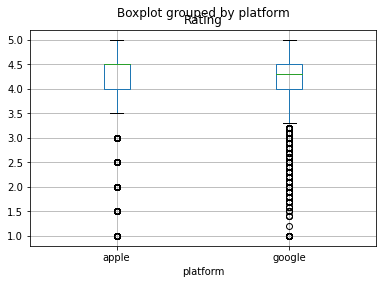

In [78]:
df.boxplot('Rating', by='platform')
plt.show()

Here we see the same information as in the analytical summary, but with a boxplot. Can you see how the boxplot is working here? 

## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** is just:

**H<sub>null</sub>**: the observed difference in the mean rating of Apple Store and Google Play apps is due to chance (and thus not due to the platform).

The more interesting hypothesis is called the **Alternate hypothesis**:

**H<sub>alternative</sub>**: the observed difference in the average ratings of apple and google users is not due to chance (and is actually due to platform)

We're also going to pick a **significance level** of 0.05. 

### 3b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. 

There are many different statistical tests, all with different assumptions. You'll generate an excellent judgement about when to use which statistical tests over the Data Science Career Track course. But in general, one of the most important things to determine is the **distribution of the data**.   

In [82]:
apple = df[df['platform'] == 'apple'].Rating
google = df[df['platform'] == 'google'].Rating

In [84]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [85]:
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


Since the null hypothesis of the normaltest() is that the data are normally distributed, the lower the p-value in the result of this test, the more likely the data are to be non-normal. 

Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that the data are not normally distributed. 

We can actually also check out the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)
As well as a roughly identical mean, median and mode. 

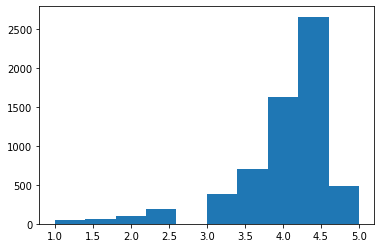

In [88]:
plt.hist(apple)
plt.show()

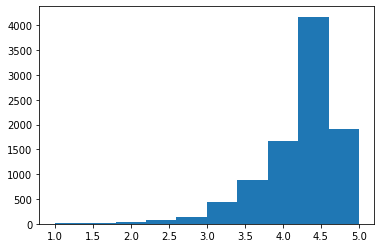

In [90]:
plt.hist(google)
plt.show()

### 3c. Permutation test
Since the data aren't normally distributed, we're using a *non-parametric* test here. This is simply a label for statistical tests used when the data aren't normally distributed. These tests are extraordinarily powerful due to how few assumptions we need to make.  

Check out more about permutations [here.](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/)

In [97]:
df['Permutation1'] = np.random.permutation(df['Rating'])
df.groupby('platform').Permutation1.describe().T

platform,apple,google
count,6268.000000,9366.000000
mean,4.143299,4.129116
std,0.611781,0.613703
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.300000,4.300000
75%,4.500000,4.500000
max,5.000000,5.000000


In [98]:
df.groupby('platform').Rating.describe().T

platform,apple,google
count,6268.000000,9366.000000
mean,4.049697,4.191757
std,0.726943,0.515219
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.500000,4.300000
75%,4.500000,4.500000
max,5.000000,5.000000


In [105]:
difference = []

for i in range(10000):
    df['Permutation1']  = np.random.permutation(df['Rating'])
    diff = df.groupby('platform').Permutation1.mean()[0] - df.groupby('platform').Permutation1.mean()[1]
    difference.append(diff)

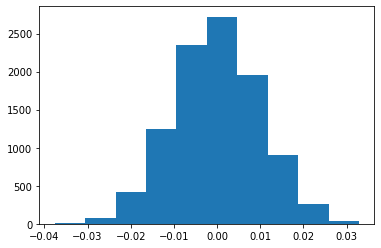

In [107]:
histo = plt.hist(difference)

In [109]:
obs_difference = df.groupby('platform').Rating.mean()[0] - df.groupby('platform').Rating.mean()[1]
obs_difference = abs(obs_difference)
print(obs_difference)

0.14206054745123442


In [116]:
difference = list(map(lambda x : x*-1, difference))

## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?

In [128]:
p = sum(difference >= obs_difference)/10000
print('The p-value is: ', p)

if p < 0.05:
    print('We can reject the null value')
else:
    print('We cannot reject the null value')

The p-value is:  0.0
We can reject the null value


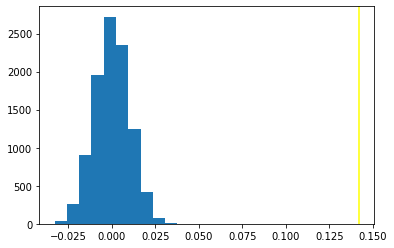

In [126]:
plt.hist(difference)
plt.axvline(obs_difference, color='yellow')
plt.show()

### 4b. What is our decision?
So actually, zero differences are at least as extreme as our observed difference!

So the p-value of our observed data is 0. 

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the Null.

We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate **only Google Play** into their operating system interface. 